# Projet Apprentissage 

# READ ME

projet cours apprentissage artificiel - M1 info

Réalisé en python avec jupyter notebook.

Jupyter notebook est installé de base avec Anaconda (ainsi que beaucoup de bibliothèques utiles pour le machine learning). je vous conseille donc d'installer Anaconda avec le lien suivant :

https://www.anaconda.com/distribution/

La version de python utilisée est la 3.7.

Ouvrez ensuite Anaconda navigator et cliquez sur launch de Jupyter Notebook, une nouvelle fenetre de votre navigateur internet s'ouvrira avec une interface sur le HOME de votre machine, recherchez le fichier comparaison_algo_classification.ipynb et ouvrez le.

Pour lancer le code de toute la page vous pouvez cliquer sur 'Noyau' dans les onglets de l'interface puis 'Redémarrer et tout exécuter". Sinon pour interpreter cellule par cellule faites Shift+Entrer sur la cellule à interpreter.

***


# Bibliothèques

Dans la cellule suivante vous trouverez toutes les bibliothèques utilisées dans ce projet.

    La version de Python est la 3.7.1,
    La version de Pandas est la 0.23.4, utilisée pour afficher les tableaux,
    La version de Matplotlib est la 3.0.2, utilisée pour l'affichage des graphes,
    La version de Numpy est la 1.15.4, utilisée pour les matrices des données,
    La version de sklearn (scikit-learn) est la 0.20.1, utilisée pour importer les données et classifieurs.

In [1]:
print("Versions des différents outils utilisés :")
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics.scorer import check_scoring
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

Versions des différents outils utilisés :
Python version: 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
pandas version: 0.23.4
matplotlib version: 3.0.2
NumPy version: 1.15.4
scikit-learn version: 0.20.1


# Données
Les données utilisées sont les suivantes :
    
    - iris (iris)
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
    
    - chiffres (chiffre)
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

    - vin (vin)
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

    - cancer du sein (cancer)
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

***

La fonction `load(database="iris", affichage=True)` charge les données en fonction de la base souhaitée.
Si affichage est vrai alors il affiche le descriptif des données fournis dans la classe.

In [2]:
def load(database="iris", affichage=True):
    if database == "iris":
        data = load_iris()
    elif database == "chiffre":
        data = load_digits()
    elif database == "vin":
        data = load_wine()
    elif database == "cancer":
        data = load_breast_cancer()
    else :
        print("\nErreur\nLa base de donnée de base doit être :")
        print("\t- iris")
        print("\t- chiffre")
        print("\t- vin")
        print("\t- cancer")
        print("La base de donnée utilisée sera celle des iris")
        data = load_iris()

    if affichage :
        print(data['DESCR'])

    return data

# Séparation des données d'entrainement et de test
La fonction train_test_split vous renvoie les données de tests et les données d'apprentissage

parametres : 

    data.data : matrice des données du jeu de données (par exemple la taille des sépals pour les iris),
    data.target : tableau des classes du jeu de données (data.target[i] correspond à la classe de la ligne i de la matrice des données),
    stratify : permet de séparer les lignes entre les données tests et apprentissage en fonction du tableau passé comme stratify (si c'est un tableau de 0 et 1 correspondant aux classes du jeu de donnée et qu'il contient 30% de 0 et 70% de 1 alors les jeux de tests et apprentissage contiendront 30% de 0 et 70% de 1),
    test_size : proportion de donnée dans le jeu de test (25% par défaut)
    random_state : donne le graine du générateur aléatoire pour la séparation des données
    
retourne :

    X_train : Données d'entrainement
    X_test  : Données de test
    y_train : classes des données d'entrainement
    y_test  : classes des données de tests

***

Voici un exemple avec la base de donnée des vins :

    Dans un premier temps nous chargeons les données chiffres, 
    puis nous séparons les données sur le jeu d'entrainement et le jeu de test,
    nous créons ensuite un arbre de décision (uniquement avec les critères de création de l'arbre),
    puis appelons la fonction fit avec le jeu d'apprentissage, ce qui génère l'arbre de décision vis à vis des critères renseignés précédemment,
    l'appel à la fonction score permet de tester les données passées en paramètre sur l'arbre et d'obtenir la précision obtenue sur le jeu.

In [3]:
data = load("chiffre", False)
X_train, X_test, y_train, y_test = train_test_split( 
    data.data, data.target, stratify=data.target, test_size=0.33, random_state=42)
tree = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
    min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

tree.fit(X_train, y_train)
print("Précision sur le jeu d'apprentissage: {:.3f}".format(tree.score(X_train, y_train)))
print("Précision sur le jeu de test: {:.3f}".format(tree.score(X_test, y_test)))

Précision sur le jeu d'apprentissage: 1.000
Précision sur le jeu de test: 0.848


# Cross validation

La fonction `cross_val_score` permet de réaliser la cross validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

`cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’)`

parametres:

    estimator : le classifieur à utiliser (doit implementer la methode fit)
    X : donnees à utiliser (ex : iris.data)
    y : en cas de supervisation, la variable à predire
    cv : dans notre cas nous ne l'utiliserons que pour déterminer le nombre de plis
    
retourne :
    
    le tableau avec les estimations pour chaque tour de cross validation

***

De base, elle ne renvoie pas les arbres créés pendant la cross validation, il a donc fallu modifier legèrerement la methode cross_val_score de sklearn pour retourner les arbres générés après l'exécution de la fonction

In [4]:
def cross_val_score_modif(estimator, X, y=None, groups=None, scoring=None, cv='warn',
                    n_jobs=None, verbose=0, fit_params=None,
                    pre_dispatch='2*n_jobs', error_score='raise-deprecating'):
    scorer = check_scoring(estimator, scoring=scoring)

    cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
                                scoring={'score': scorer}, cv=cv,
                                n_jobs=n_jobs, verbose=verbose,
                                fit_params=fit_params,
                                pre_dispatch=pre_dispatch,
                                error_score=error_score, 
                                return_estimator=True)
    return cv_results

# Algorithmes de classification

Voici les différents algorithmes de classification que nous avons utilisé pour ce projet :

## DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Pour les arbres de décision, le paramètre que nous faisons varier est le nombre minimum d'élément dans les feuilles de l'arbre.

## KNeighborsClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Pour KNN, la variable sera le nombre de voisins à prendre en compte.

## RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Pour les forêts, plusieurs paramètres sont intéressants, nous avons choisi de modifier le nombre d'arbre dans la forêt avec un nombre d'éléments par feuille de 2 au minimum étant donné que c'est le meilleur résultat pour les arbres de décision.


# DecisionTreeClassifier

Dans la cellule suivante nous utilisons l'algorithme d'arbre de décision. 

Nous faisons varier le nombre de d'échantillons minimum dans chaque feuilles de 2 à 10% du nombre de données.

    Vous pouvez changer la base de donnée utilisée en changeant le parametre database à la ligne 2 ("iris" "chiffre" "vin" ou "cancer" ).
    Pour changer le nombre d'échantillon minimum par feuille max à tester modifiez la valeur de borne_max.
    Pour modifier le pas entre deux tests jouez avec la variable pas.

Augmentation du nombre minimum d'élément dans les feuilles de 2 à 179 avec un pas de 17
Le temps d'execution peut durer quelques secondes (le temps s'affiche quand le calcul est terminé)
0.714911937713623


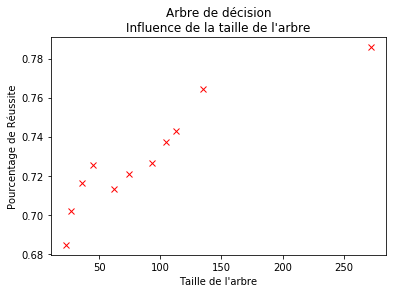

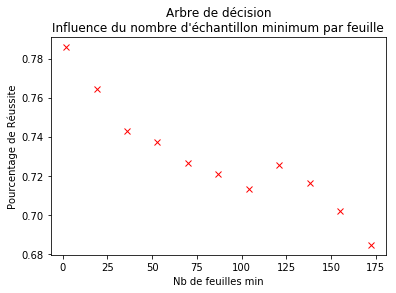

,Nb échantillon minimum par feuille,Taille de l'arbre,Pourcentage de réussite
0,2,272,0.785834
1,19,135,0.764386
2,36,113,0.743152
3,53,105,0.737090
4,70,93,0.726379
5,87,74,0.720783
6,104,62,0.713022
7,121,45,0.725218
8,138,36,0.716329
9,155,27,0.701803


In [5]:
b = time.time()
data = load(database="chiffre" , affichage=False)
borne_max = int(data.data.shape[0]*0.10)
pas = int((int(data.data.shape[0]*0.10)-2)/10)
nb_plis = 5

scores = []
nb_feuilles = []
size_tree = []

print("Augmentation du nombre minimum d'élément dans les feuilles de 2 à %d avec un pas de %d"%(borne_max,pas))
print("Le temps d'execution peut durer quelques secondes (le temps s'affiche quand le calcul est terminé)")
for i in range(2,borne_max,pas):
    tree = DecisionTreeClassifier(min_samples_split=i)
    result = cross_val_score_modif(tree, data.data, data.target, cv=nb_plis)
    scores.append(np.mean(result['test_score']))
    nb_feuilles.append(i)
    taille = []
    for t in result["estimator"]:
        taille.append(t.tree_.node_count)
    size_tree.append(int(np.mean(taille)))
e = time.time()
print(e-b)

plt.plot(size_tree, scores, 'rx')
plt.xlabel('Taille de l\'arbre')
plt.ylabel('Pourcentage de Réussite')
plt.title("Arbre de décision\nInfluence de la taille de l'arbre")
plt.show()
plt.plot(nb_feuilles, scores, 'rx')
plt.xlabel('Nb de feuilles min')
plt.ylabel('Pourcentage de Réussite')
plt.title("Arbre de décision\nInfluence du nombre d'échantillon minimum par feuille")
plt.show()
datapd = {
    "Nb échantillon minimum par feuille" : pd.Series(nb_feuilles,index=list(range(0,11))),
    "Taille de l'arbre" : pd.Series(size_tree , index=list(range(0,11))),
    "Pourcentage de réussite" : pd.Series(scores,index=list(range(0,11)))
}
pd.DataFrame(datapd)

Comme vous pouvez le constater plus le nombre d'échantillon par feuille minimum augmente, plus la précision diminue, le meilleur cas est donc avec deux feuilles.

***

# KNeighborsClassifier

Dans la cellule suivante nous utilisons l'algorithme KNN. 

Nous faisons varier le nombre de voisins pris en compte de 3 à 15% du nombre de données.

    Vous pouvez changer la base de donnée utilisée en changeant le parametre database à la ligne 2 ("iris" "chiffre" "vin" ou "cancer" ).
    Pour changer le nombre de voisins max à tester modifiez la valeur de borne_max.
    Pour modifier le pas entre deux tests jouez avec la variable pas.

Le temps d'execution est d'environ 16s.

Augmentation du nombre de voisins utilisés de 3 à 269 avec un pas de 26
Le temps d'execution peut durer quelques 10aines de secondes (le temps s'affiche quand le calcul est terminé)
17.059762477874756


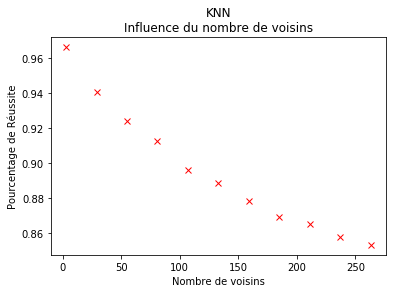

,Pourcentage de réussite,Nombre de voisins
0,0.966114,3
1,0.940546,29
2,0.923788,55
3,0.912651,81
4,0.895945,107
5,0.888163,133
6,0.878111,159
7,0.869203,185
8,0.864743,211
9,0.857486,237


In [6]:
b = time.time()
data = load(database="chiffre" , affichage=False)
scores = []
nb_voisin = []
borne_max = int(data.data.shape[0]*0.15)
pas = int((int(data.data.shape[0]*0.15)-2)/10)
nb_plis = 5

print("Augmentation du nombre de voisins utilisés de 3 à %d avec un pas de %d"%(borne_max,pas))
print("Le temps d'execution peut durer quelques 10aines de secondes (le temps s'affiche quand le calcul est terminé)")
for i in range(3,borne_max,pas):
    cls = KNeighborsClassifier(n_neighbors=i)
    result = cross_val_score_modif(cls, data.data, data.target, cv=nb_plis)
    scores.append(np.mean(result['test_score']))
    nb_voisin.append(i)
e = time.time()
print(e-b)

plt.plot(nb_voisin, scores, 'rx')
plt.title("KNN\nInfluence du nombre de voisins")
plt.xlabel("Nombre de voisins")
plt.ylabel('Pourcentage de Réussite')
plt.show()
datapd = {
    "Pourcentage de réussite" : pd.Series(scores,index=list(range(0,11))),
    "Nombre de voisins" : pd.Series(nb_voisin , index=list(range(0,11)))
}
pd.DataFrame(datapd)

Plus le nombre de voisin augmente plus la précision diminue sur les données de chiffre, un nombre de voisin entre 3 et 30 semble être une bonne valeur.
***

# RandomForestClassifier

Dans la cellule suivante nous utilisons l'algorithme de forêt aléatoire. 

Nous faisons varier le nombre d'arbres de 1 à 40. (la précision reste relativement constante une fois les 30 arbres passés)

    Vous pouvez changer la base de donnée utilisée en changeant le parametre database à la ligne 2 ("iris" "chiffre" "vin" ou "cancer" ).
    Pour changer le nombre d'arbres max à tester modifiez la valeur de borne_max.
    Pour modifier le pas entre deux tests jouez avec la variable pas.

Le temps d'execution est d'environ 16s.

Augmentation du nombre d'arbres de 1 à 40 avec un pas de 1
Le temps d'execution peut durer quelques 10aines de secondes (le temps s'affiche quand le calcul est terminé)
10.33961534500122


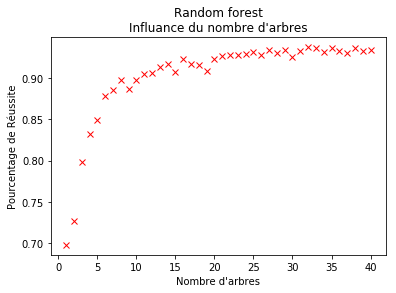

,Pourcentage de réussite,Nombre d'arbres
0,0.697805,1
1,0.726975,2
2,0.798080,3
3,0.832173,4
4,0.848726,5
5,0.877722,6
6,0.884978,7
7,0.897693,8
8,0.886677,9
9,0.897214,10


In [7]:
b = time.time()
data = load(database="chiffre" , affichage=False)
scores = []
nb_arbres = []
borne_max = 40
pas = 1
nb_plis = 5

print("Augmentation du nombre d'arbres de 1 à %d avec un pas de %d"%(borne_max,pas))
print("Le temps d'execution peut durer quelques 10aines de secondes (le temps s'affiche quand le calcul est terminé)")
for i in range(1,borne_max+1,pas):
    cls = RandomForestClassifier(n_estimators=i)
    result = cross_val_score_modif(cls, data.data, data.target, cv=nb_plis)
    scores.append(np.mean(result['test_score']))
    nb_arbres.append(i)
e = time.time()
print(e-b)

plt.plot(nb_arbres, scores, 'rx')
plt.title("Random forest\nInfluance du nombre d'arbres")
plt.xlabel("Nombre d'arbres")
plt.ylabel('Pourcentage de Réussite')
plt.show()
datapd = {
    "Pourcentage de réussite" : pd.Series(scores,index=list(range(0,borne_max))),
    "Nombre d'arbres" : pd.Series(nb_arbres , index=list(range(0,borne_max)))
}
pd.DataFrame(datapd)

Le taux de réussite semble tendre vers 0.93, nous pouvons constater une croissance très rapide d'un arbre à environs 10 arbres, ensuite entre 30 et 200 la valeur change peu (testé précédemment mais retour à 40 car le calcul devient très long)

***

# Autres possibilités

Le lien suivant donne un affichage pour plusieurs classifieurs fournis dans sklearn.

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
